# Visualització de representacions visuals en models d’aprenentatge profund supervisats i auto-supervisats 

Julia Artigas Rodriguez
1531609

In [1]:
#imports necessaris
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms, utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageChops
import torchvision.transforms as transforms
from google.colab import files
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision.models as models
from torch.optim import lr_scheduler
import time
import os
import copy
import torchvision
!pip install --quiet lightning-bolts
!pip install --quiet git+https://github.com/greentfrapp/lucent.git
from lucent.optvis import render, param, transform, objectives
from pl_bolts.models.self_supervised import SimCLR # per carregar el model auto-supervisat (SimCLR)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torchsummary import summary
import numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image

     |████████████████████████████████| 316 kB 6.8 MB/s 
     |████████████████████████████████| 418 kB 7.9 MB/s 
     |████████████████████████████████| 584 kB 45.3 MB/s 
     |████████████████████████████████| 596 kB 46.8 MB/s 
     |████████████████████████████████| 140 kB 74.4 MB/s 
     |████████████████████████████████| 1.1 MB 48.3 MB/s 
     |████████████████████████████████| 144 kB 58.9 MB/s 
     |████████████████████████████████| 271 kB 61.9 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 225 kB 7.0 MB/s 
     |████████████████████████████████| 297 kB 64.7 MB/s 
     |████████████████████████████████| 297 kB 70.7 MB/s 
     |████████████████████████████████| 297 kB 85.9 MB/s 
     |████████████████████████████████| 296 kB 66.3 MB/s 
     |████████████████████████████████| 296 kB 60.4 MB/s 
     |████████████████████████████████| 280 kB 62.1 MB/s 
     |████████████████████████████████| 280 kB 59.4 MB/s 
     |█████████████

Lleguir els models i veure les capes que tenen

In [2]:
resnet50 = torchvision.models.resnet50(pretrained = True, progress = True)
weight_path = 'https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'
resnet50_ss = SimCLR.load_from_checkpoint(weight_path, strict=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50.to(device).eval()
resnet50_ss.to(device).eval()
summary(resnet50, (3, 224, 224))
summary(resnet50_ss, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt" to /root/.cache/torch/hub/checkpoints/simclr_imagenet.ckpt


  0%|          | 0.00/229M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:218: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['non_linear_evaluator.block_forward.2.weight', 'non_linear_evaluator.block_forward.2.bias']
  f"Found keys that are not in the model state dict but in the checkpoint: {keys.unexpected_keys}"


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Comparar primeres y ultimes capes

Supervised learning
conv1:0


100%|██████████| 512/512 [02:00<00:00,  4.27it/s]



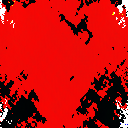

conv1:25


100%|██████████| 512/512 [01:54<00:00,  4.47it/s]



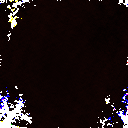

conv1:50


100%|██████████| 512/512 [01:55<00:00,  4.45it/s]



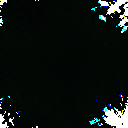

Self-supervised learning
encoder_conv1:0


100%|██████████| 512/512 [01:59<00:00,  4.30it/s]



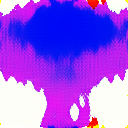

encoder_conv1:25


100%|██████████| 512/512 [01:57<00:00,  4.35it/s]



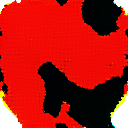

encoder_conv1:50


100%|██████████| 512/512 [01:59<00:00,  4.29it/s]



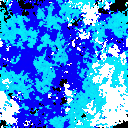

In [3]:
print('Supervised learning')
ll=[]
for i in range(0,64):
  ll.append("conv1:"+str(i))
for obj in range(0,len(ll),25):
  print(ll[obj])
  _ = render.render_vis(resnet50, ll[obj], show_inline=True)
print('Self-supervised learning')
ll=[]
for i in range(0,64):
  ll.append("encoder_conv1:"+str(i))
for obj in range(0,len(ll),25):
  print(ll[obj])
  _ = render.render_vis(resnet50_ss, ll[obj], show_inline=True)

avgpool:0


100%|██████████| 512/512 [05:22<00:00,  1.59it/s]



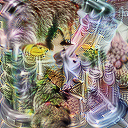

avgpool:200


100%|██████████| 512/512 [05:21<00:00,  1.59it/s]



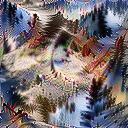

avgpool:400


100%|██████████| 512/512 [05:17<00:00,  1.61it/s]



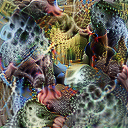

encoder_avgpool:0


100%|██████████| 512/512 [05:24<00:00,  1.58it/s]



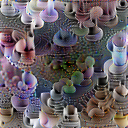

encoder_avgpool:200


100%|██████████| 512/512 [05:51<00:00,  1.46it/s]



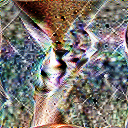

encoder_avgpool:400


100%|██████████| 512/512 [05:54<00:00,  1.44it/s]



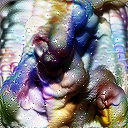

In [4]:
ll=[]
for i in range(0,500):
  ll.append("avgpool:"+str(i))
for obj in range(0,len(ll),200):
  print(ll[obj])
  _ = render.render_vis(resnet50, ll[obj], show_inline=True)
ll=[]
for i in range(0,500):
  ll.append("encoder_avgpool:"+str(i))
for obj in range(0,len(ll),200):
  print(ll[obj])
  _ = render.render_vis(resnet50_ss, ll[obj], show_inline=True)